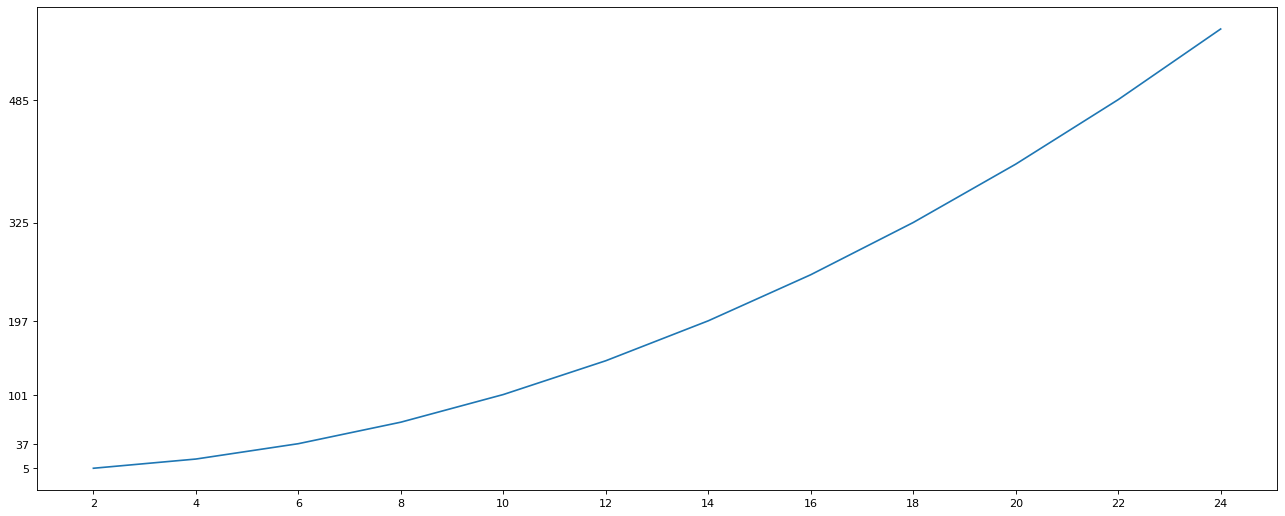

In [14]:
#mateplotlib用法
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8),dpi=80)   #(图片大小，清晰度)
            # 通过实例化一个figure并传递参数，能够在后台自动使用该figure实例
            #通过设置dpi值来设置图片清晰度
x = [i for i in range(2,26,2)]
y = [(i*i + 1) for i in x]

#绘图
plt.plot(x,y)
#绘制刻度
#_xtick_labels = [i/2 for i in range(4,49)]  #弥补range不能以浮点数为步长
plt.xticks(x)              #以参数的形式绘制x轴刻度，如range(1,26)
                           #注意range里用不了浮点数格式的数字，可自制列表代替
                           #自制列表可用li[::3]来设置步长，调整坐标点稀疏程度
plt.yticks(y[::2])   #range(min(y),max(y)+1)

plt.savefig("./sig_size.svg")    #保存图片，可保存为svg矢量格式
                                 #./sig_size.png表示图片保存在当前路径下，及图片名字与格式


plt.show()

In [1]:
var1 = 'hello world!'
var2 = "Runoob"
print(type(var1))
print(len(var1))
print(var1[1:5])

<class 'str'>
12
ello


In [2]:
name = 'Licy'
print(f'I am {name}')
print(r'I am \ok')

I am Licy
I am \ok


In [3]:
sentence = 'hello world!'
print(sentence.capitalize())
print(sentence.upper())
print(sentence.title())

Hello world!
HELLO WORLD!
Hello World!


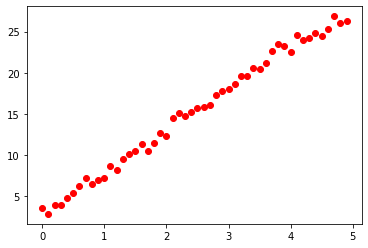

<function matplotlib.pyplot.show(close=None, block=None)>

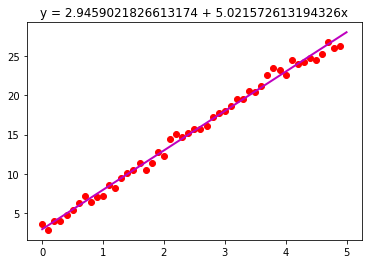

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#在直线 y = 3 + 5x 附近生成随机点

      #numpy中的range模块，可接受浮点数步长
X = np.arange(0,5,0.1)
Z = [3 + 5*x for x in X]
      #numpy.random.normal(loc=0.0, scale=1.0, size=None)
      #正态分布(均值，标准差，默认输出一个值)
Y = [np.random.normal(z,0.5) for z in Z]

plt.plot(X,Y,'ro')
plt.show()

#设 y = a0 + a1*x，我们利用最小二乘法的正则方程组来求解未知系数 a0 与 a1。
#numpy 的 linalg 模块中有一个 solve 函数，它可以根据方程组的系数矩阵和方程右端构成的向量来求解未知量
def linear_regression(x,y):
    N = len(x)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x**2)      # **表示乘方,sum求和函数
    sumxy = sum(x*y)
    
    A = np.mat([[N,sumx],[sumx,sumx2]])      #建立系数矩阵
    b = np.array([sumy,sumxy])               #此处有过错误，sumx
    
    return np.linalg.solve(A,b)              #求解线性方程组

a0,a1 = linear_regression(X,Y)

#生成拟合直线绘制点，绘制拟合直线
_X = [i for i in range(0,6)]
#test  _X = [0,5]
_Y = [(a0 + a1*x) for x in _X]

plt.plot(X,Y,'ro',_X,_Y,'m',linewidth = 2) #ro 散点图；m洋红色线
plt.title("y = {} + {}x".format(a0,a1))    #字符串中大括号可以被识别，注意此处用法
plt.show


In [ ]:
#分段lagrange插值
def get_LRfunction(X,Y):
    down = 1
    up = 1
    Ln = 0
    def LR(x):
        nonlocal up
        nonlocal Ln
        up *= (x - X[j])        
        Ln += yi*up/down              #???
        
    list_li = []
    for i in range(len(Y)):
        yi = Y[i]
        for j in range(len(X)):
            if i == j:
                continue
            down *= (X[i] - X[j])
            LR(x)
    return LR
        
X = [i for i in range(10)]
Y = [9,0.3,5,9.5,7.8,5.9,6.6,6.5,2.1,3.2]
get_LRfunction(X,Y)

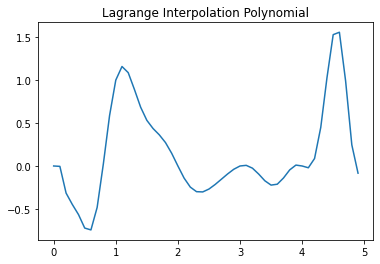

In [8]:
#此拉格朗日插值程序有问题，但我看不出问题在哪
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

def get_Ln(X,Y):
    def rtn_func(x):
        rtn = 1
        ln = 0
        for i in range(len(Y)):
            for j in range(len(X)):
                if i == j: 
                    continue
                rtn*=x-X[j]
                rtn/=X[i]-X[j]
            rtn *= Y[i]
            ln += rtn
            #rtn_item.append(rtn)
        return ln
    return rtn_func

X = [1,2,3,4,5,0]
Y = [1,2,2,6,-1,-1]
ln = get_Ln(X,Y)
#print(type(ln))
x=np.arange(0,5,0.1)    # 范围[0,5)，间隔0.1
y=[ln(i) for i in x]  # 获取值
plt.title("Lagrange Interpolation Polynomial")
plt.plot(x,y)
plt.show()              # 运用matplotlib显示图像                        

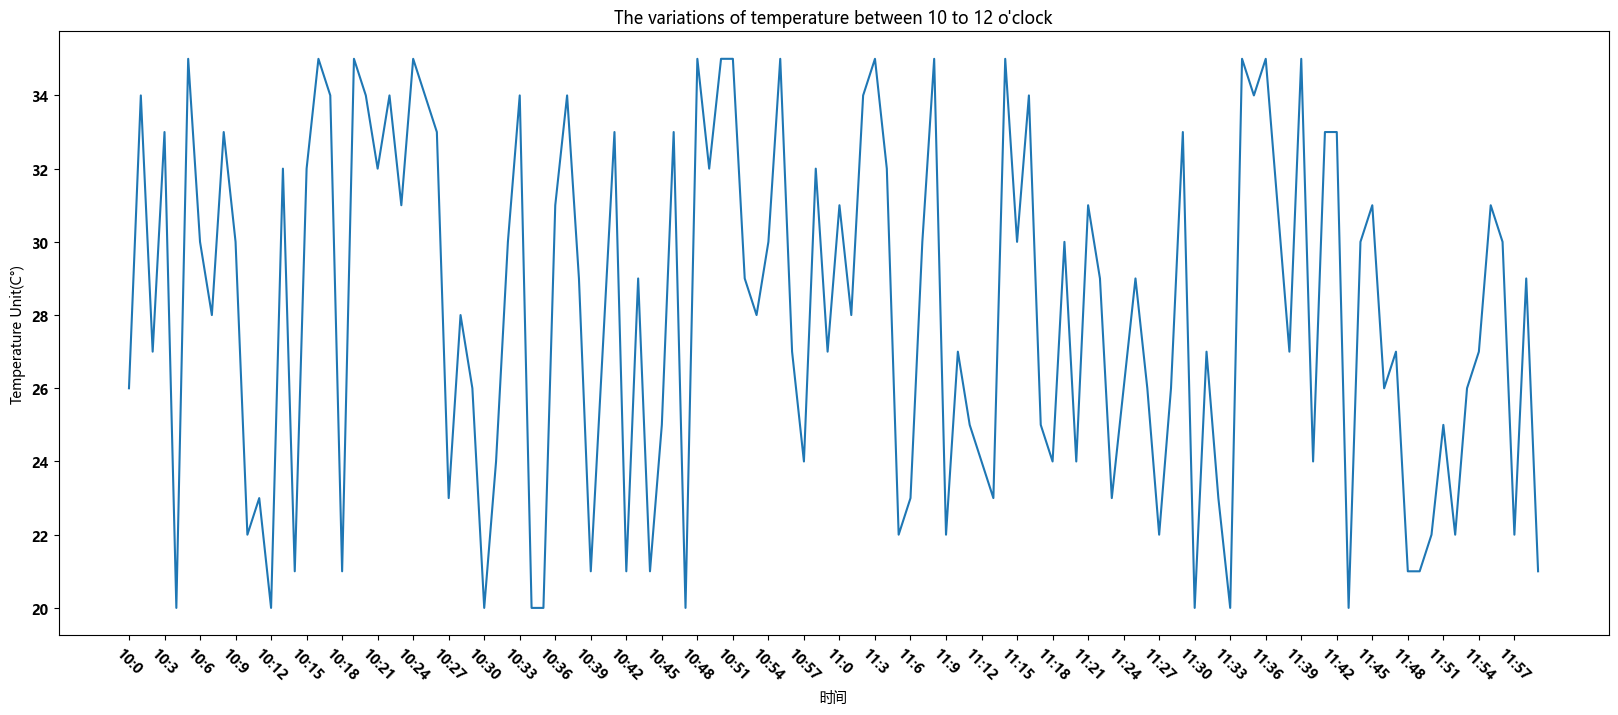

In [21]:
#折线图表示两小时内的随机气温，每分钟随机一个值
from matplotlib import pyplot as plt
import random
import matplotlib

#matpoltlib中的rc方法设置字体显示的大小，格式，颜色等信息
font = {'family':'Microsoft YaHei',
        'weight':'bold',
        'size':'10'
         }
matplotlib.rc("font",**font)
x = range(0,120)
y = [random.randint(20,35) for i in range(120)]

plt.figure(figsize = (20,8),dpi = 100)

plt.plot(x,y)

#调整x的刻度
    #制作代替坐标点投影值的标签
_xtick_lables = ['10:{}'.format(i) for i in range(60)]
_xtick_lables += ['11:{}'.format(i) for i in range(60)]
    #对应左边点，显示等长度列表中的字符串标签，旋转-90°
plt.xticks(list(x)[::3],_xtick_lables[::3],rotation = -45) 

#添加x、y轴描述信息
plt.xlabel('时间')
plt.ylabel('Temperature Unit(C°)')
plt.title("The variations of temperature between 10 to 12 o'clock")
plt.show()

In [1]:
print('131')

131


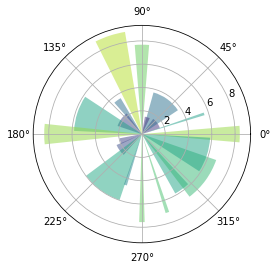

150


In [8]:
'''
Pie chart on polar axis
**************************
Demo of bar plot on polar axis.
'''
import numpy as np
import matplotlib.pyplot as plt

#Computer pie slices
N = 20
theta = np.linspace(0.0,2*np.pi,N,endpoint=False)
radii = 10*np.random.rand(N)
width = np.pi / 4*np.random.rand(N)

ax = plt.subplot(111,projection='polar')
bars = ax.bar(theta,radii,width=width,bottom=0.0)

#Use custom colors and opacity
for r,bar in zip(radii,bars):
    bar.set_facecolor(plt.cm.viridis(r/10.))
    bar.set_alpha(0.5)
    
plt.show()
print('150')

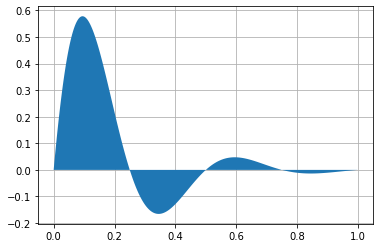

In [17]:
"""
A simple Fill plot
*******************
This example showcases the most basic fill plot a user can do with matplotlib.
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,500)
y = np.sin(4*np.pi*x)*np.exp(-5*x)   #两个谐波周期衰减

fig,ax = plt.subplots()

ax.fill(x,y, zorder=10)     #ax.fill()填充函数
ax.grid(True, zorder=5)     #绘制背景网格，数量为5
plt.show()

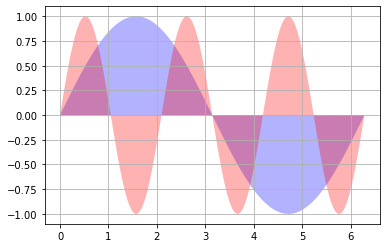

180


In [20]:
"""
In addition to the basic fill plot ,this demo shows a few optional features:
        * Multiple curves with a single comand.    一条指令实现多条曲线
        *Setting the fill color.
        *Setting the opacity(alpha value)           设置透明度
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,500)
y1 = np.sin(x)
y2 = np.sin(3*x)

fig,ax = plt.subplots()
ax.fill(x,y1,'b',x,y2,'r',alpha=0.3)
ax.grid(True,zorder=10)
plt.show()
print('180')

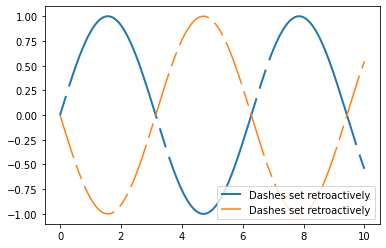

In [23]:
"""
A simple plot with a custom dashed line
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,500)
dashes = [10,5,100,5]                #双虚线两个线的长度

fig,ax = plt.subplots()
line1, = ax.plot(x,np.sin(x),'--',linewidth=2,
                label='Dashes set retroactively')
line1.set_dashes(dashes)

line2, = ax.plot(x,-1*np.sin(x),dashes=[30,5,10,5],
                label='Dashes set retroactively')

ax.legend(loc='lower right')
plt.show()

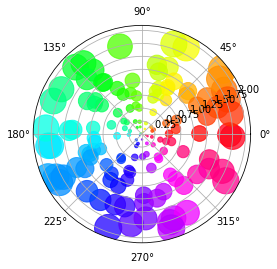

220


In [28]:
"""
Scatter plot on polar axis      极轴上的散点图
Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered ).   只是为了验证符号是否正确散落

"""
import numpy as np
import matplotlib.pyplot as plt

#Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()
print('220')